# IIB40303 - PROGRAMMING FOR DATA ANALYTIC
#### GROUP ASSIGNMENT

>#### 1. IQBAL SHAH BIN ABDUL HALIM SHAH (52224223215)
>#### 2. AUNI NUWAIRAH BINTI ALI NORDIN (52224223243)



### TITLE: ANALYSIS ON MALAYSIAN CONDOMINIUM PRICES DATA

>#### Reference Dataset: https://www.kaggle.com/datasets/mcpenguin/raw-malaysian-housing-prices-data/data
>#### Link Video Presentation :
>#### Link GitHub :

# Data Loading

In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To ignore all warnings (recommended for clean output only, not during debugging)
import warnings
warnings.filterwarnings('ignore')

This code sets up the Python environment for data analysis and visualization by importing key libraries: NumPy for numerical operations, pandas for handling and analyzing tabular data, Seaborn and Matplotlib for creating visualizations. It also disables warning messages to keep the output clean, which is helpful for presentation but not ideal when debugging.

In [238]:
# Load the dataset
df = pd.read_csv('houses.csv')

The dataset houses.csv was imported into a pandas DataFrame named df, enabling efficient data exploration, analysis, and visualization using Python's data science libraries.

# Data Formatting and Filtering

In [242]:
columns_to_drop = [
    'description',
    'Nearby School',
    'Nearby Mall',
    'Ad List',
    'Category',
    'Firm Type',
    'Firm Number',
    'REN Number',
    'Nearby Railway Station'
]

df = df.drop(columns=columns_to_drop, errors='ignore')

# Display the columns after dropping
print("Columns after dropping:")
print(df.columns)

Columns after dropping:
Index(['Bedroom', 'Bathroom', 'Property Size', 'Facilities', 'Building Name',
       'Developer', 'Tenure Type', 'Address', 'Completion Year', '# of Floors',
       'Total Units', 'Property Type', 'Parking Lot', 'Floor Range',
       'Land Title', 'Bus Stop', 'Mall', 'Park', 'School', 'Hospital', 'price',
       'Highway', 'Railway Station'],
      dtype='object')


The specified columns, including `'description'`, `'Nearby School'`, `'Nearby Mall'` and others, were removed from the DataFrame to focus the analysis on relevant features. The removal was performed safely by ignoring any columns that were not present. After this process, the remaining columns include key property attributes such as `'Bedroom'`, `'Bathroom'`, `'Property Size'`, `'Facilities'`, `'Price'` and various location-related features, ensuring the dataset is streamlined for subsequent analysis.

In [245]:
# Convert Bedroom to Numeric
df['Bedroom'] = pd.to_numeric(df['Bedroom'], errors='coerce')

# Check for any values that could not be converted (they will be NaN)
print("\nNumber of NaNs in 'Bedroom' after conversion:")
print(df['Bedroom'].isnull().sum())


Number of NaNs in 'Bedroom' after conversion:
1


The `'Bedroom'` column was converted to a numeric data type to enable numerical analysis.

In [248]:
# convert '-' to NaN
for col in df.select_dtypes(include='object').columns:
  # Replace '-' with None/NaN in these columns
  df[col] = df[col].replace('-', np.nan)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Bedroom               1
Bathroom              1
Property Size         0
Facilities          641
Building Name        87
Developer          1731
Tenure Type           0
Address              87
Completion Year    2021
# of Floors        1749
Total Units        1902
Property Type         0
Parking Lot        1219
Floor Range        1062
Land Title            0
Bus Stop           3292
Mall               3525
Park               3193
School             3052
Hospital           3657
price                 0
Highway            3859
Railway Station    3515
dtype: int64


This code replaces all occurrences of the string `'-'` in columns with object (text) data type with `NaN` to standardize missing or unknown values.

In [251]:
# Convert str(Property Size) to numeric by removing sq.ft.
df['Property Size'] = df['Property Size'].str.replace(' sq.ft.', '', regex=False)
df['Property Size'] = pd.to_numeric(df['Property Size'])
print("Property Size in Numeric:")
print(df['Property Size'].head())

Property Size in Numeric:
0    1000
1     980
2    1000
3     592
4     467
Name: Property Size, dtype: int64


This process converts the `'Property Size'` column from a string format that includes the unit `" sq.ft."` into a numeric format. 

In [254]:
# Convert str(price) to numeric
df['price'] = df['price'].astype(str).str.replace('RM ', '', regex=False).str.replace(' ', '', regex=False)
df['price'] = pd.to_numeric(df['price'])
print("Price in Numeric:")
print(df['price'].head())

Price in Numeric:
0    340000
1    250000
2    230000
3    158000
4    305000
Name: price, dtype: int64


This process standardizes and converts the `'price'` column from a text format into a numeric format to enable accurate analysis. By removing the `'RM '` currency prefix and any extra spaces from each value. 

In [257]:
# Add Facilities_Count
df['Facilities_Count'] = df['Facilities'].apply(lambda x: 0 if pd.isna(x) else len(x.split(',')))
print("\n'Facilities' count added as 'Facilities_Count':")
print(df[['Facilities', 'Facilities_Count']].head())


'Facilities' count added as 'Facilities_Count':
                                          Facilities  Facilities_Count
0                                                NaN                 0
1  Parking, Security, Swimming Pool, Playground, ...                 6
2  Playground, Minimart, Jogging Track, Barbeque ...                 7
3       Parking, Playground, Minimart, Jogging Track                 4
4             Minimart, Gymnasium, Parking, Security                 4


This is a list of 6 facilities. The code counts how many facilities are listed by splitting the string at each comma and counting the resulting items, which is why the new column `Facilities_Count` shows 6 for that row.

In [260]:
# Add count columns for all 'nearby location' columns
location_cols = ['Bus Stop', 'Mall', 'Park', 'School', 'Hospital', 'Railway Station']

# Create new count columns
for col in location_cols:
    # Apply a lambda function to count words separated by newline, default to 0 if empty or NaN
    df[f'{col}_Count'] = df[col].apply(lambda x: len(str(x).split('\n')) if pd.notna(x) and str(x).strip() != '' else 0)
    print(f"'{col}' count added as '{col}_Count':")
    print(df[[col, f'{col}_Count']].head())

'Bus Stop' count added as 'Bus Stop_Count':
                                            Bus Stop  Bus Stop_Count
0  Bus Stop Starparc Point\nBus Stop Setapak Cent...              22
1                                                NaN               0
2                                                NaN               0
3                                                NaN               0
4  Bus Stop at Persiaran Permai 1\nBus Stop at Pe...              12
'Mall' count added as 'Mall_Count':
                                                Mall  Mall_Count
0                                    Setapak Central           1
1                                                NaN           0
2                                                NaN           0
3                                                NaN           0
4  i-Soho i-City\nGulati\nCentral i-City Shopping...           3
'Park' count added as 'Park_Count':
                                                Park  Park_Count
0  Park at Tama

By calculating the number of each sort of close utilities and facilities such as bus stops, shopping centers, parks, schools, hospitals, and train stations that are close to a property, this result aims to measure the availability of these services.

# Data Summary

In [264]:
# Display the first few rows of the dataframe
print("First 5 rows of the dataframe:")
print(df.head())

First 5 rows of the dataframe:
   Bedroom Bathroom  Property Size  \
0      4.0        2           1000   
1      3.0        2            980   
2      3.0        2           1000   
3      3.0        1            592   
4      1.0        1            467   

                                          Facilities  \
0                                                NaN   
1  Parking, Security, Swimming Pool, Playground, ...   
2  Playground, Minimart, Jogging Track, Barbeque ...   
3       Parking, Playground, Minimart, Jogging Track   
4             Minimart, Gymnasium, Parking, Security   

               Building Name          Developer Tenure Type  \
0          Kenwingston Platz  Kenwingston Group    Freehold   
1  Kenanga (Park View Court)                NaN    Freehold   
2     Sri Lavender Apartment          TLS Group    Freehold   
3          Flat Pandan Indah                NaN   Leasehold   
4            i-Soho @ i-City           i-Berhad    Freehold   

                        

This result of the first five rows of the dataset to give a quick view of the data and help check that the cleaning and changes were applied correctly.

In [266]:
# Display information about the dataframe
print("\nDataframe Info:")
df.info()


Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bedroom                3999 non-null   float64
 1   Bathroom               3999 non-null   object 
 2   Property Size          4000 non-null   int64  
 3   Facilities             3359 non-null   object 
 4   Building Name          3913 non-null   object 
 5   Developer              2269 non-null   object 
 6   Tenure Type            4000 non-null   object 
 7   Address                3913 non-null   object 
 8   Completion Year        1979 non-null   object 
 9   # of Floors            2251 non-null   object 
 10  Total Units            2098 non-null   object 
 11  Property Type          4000 non-null   object 
 12  Parking Lot            2781 non-null   object 
 13  Floor Range            2938 non-null   object 
 14  Land Title             4000 non-null   

This result provides a summary of the DataFrame’s structure and content, including:

* The total number of rows: **4000 entries**.
* The total number of columns: **30 columns**.
* Each column’s name, the number of non-missing (non-null) values, and the data type (e.g., integer, float, object/text).
* It shows which columns have missing data by comparing the non-null count to the total rows.
* For example, the column `'Bedroom'` has 3999 non-null values (1 missing), while columns like `'Bus Stop'` and `'Mall'` have many missing values.
* The data types indicate most columns are objects (text), with some integers and one float column.
* It also shows the approximate memory usage of the DataFrame.

In [270]:
# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
           Bedroom  Property Size         price  Facilities_Count  \
count  3999.000000    4000.000000  4.000000e+03       4000.000000   
mean      2.917229    1035.049000  4.218269e+05          6.005750   
std       0.691838    2012.250439  3.286249e+05          4.107424   
min       1.000000       1.000000  3.800000e+04          0.000000   
25%       3.000000     750.000000  2.500000e+05          3.000000   
50%       3.000000     900.000000  3.500000e+05          6.000000   
75%       3.000000    1120.000000  4.900000e+05          9.000000   
max      10.000000  122774.000000  6.016000e+06         14.000000   

       Bus Stop_Count   Mall_Count   Park_Count  School_Count  Hospital_Count  \
count     4000.000000  4000.000000  4000.000000   4000.000000     4000.000000   
mean         1.768250     0.200250     0.677000      0.849000        0.125000   
std          5.432994     0.729234     1.729427      2.070814        0.634804   
min          0.000000     0.0

This shows the **descriptive statistics** for the numeric columns in the dataset, summarizing key information about the data distribution:

* **Count:** Number of non-missing values for each column (mostly 4000, except ‘Bedroom’ with 3999).
* **Mean:** The average value (e.g., average bedroom count is about 2.9, average property size is 1035 sq.ft, average price is about 421,826).
* **Standard Deviation (std):** Measures the spread or variability of the data (e.g., property sizes and prices vary widely).
* **Minimum (min) and Maximum (max):** The smallest and largest values observed (e.g., bedrooms range from 1 to 10, property sizes from 1 to 122,774 sq.ft).
* **Percentiles (25%, 50%, 75%):** Values below which a certain percentage of the data falls, helping understand the distribution shape.

In [273]:
# Count how many listings exist for each Property Type
# Helps identify which property types dominate the listings
property_type_counts = df['Property Type'].value_counts()

print("📊 Top Property Types:")
print(property_type_counts.head(5))  # Display top 5 for clarity

📊 Top Property Types:
Property Type
Condominium          1714
Apartment            1494
Service Residence     506
Flat                  247
Others                 17
Name: count, dtype: int64


This result presents the distribution of property listings by type, indicating that Condominiums and Apartments constitute the majority of the listings.

In [276]:
# Calculate average property size for each bedroom count
# Useful for identifying how size scales with bedrooms
avg_size_by_bedroom = df.groupby('Bedroom')['Property Size'].mean().dropna()

print("📐 Average Property Size by Bedroom:")
print(avg_size_by_bedroom)

📐 Average Property Size by Bedroom:
Bedroom
1.0      661.277778
2.0      753.213983
3.0     1007.492139
4.0     1517.524862
5.0     2626.250000
6.0     3827.250000
8.0     1905.000000
10.0    4500.000000
Name: Property Size, dtype: float64


This result shows the average property size for each bedroom count, illustrating how the size generally increases as the number of bedrooms rises. For example, properties with `1 bedroom` average about `661 sq.ft`, while those with `10 bedrooms` average `4500 sq.ft`.

In [279]:
# Determine the most common tenure type (e.g., Freehold or Leasehold)
# Indicates the legal ownership pattern in the dataset
most_common_tenure = df['Tenure Type'].mode().iloc[0]

print(f"🏷️ Most Common Tenure Type: {most_common_tenure}")

🏷️ Most Common Tenure Type: Freehold


The most frequent tenure type in the dataset, showing that `Freehold` is the predominant legal ownership status among the properties listed.

In [282]:
# Identify top 5 developers by number of listings
# Useful for recognizing which developers are most active
developer_counts = df['Developer'].value_counts()

print("🏗️ Top 5 Developers by Listing Count:")
print(developer_counts.head(5))

🏗️ Top 5 Developers by Listing Count:
Developer
Ideal Property Group                68
Belleview Group                     62
Asia Green Group                    54
IJM LAND BERHAD                     50
Syarikat Perumahan Negara Berhad    30
Name: count, dtype: int64


This result highlights the top 5 property developers with the most listings in the dataset, showing which companies are the most active in the market. For example, **Ideal Property Group** leads with `68` listings, followed by **Belleview Group** with `62`.

# Data Visualization

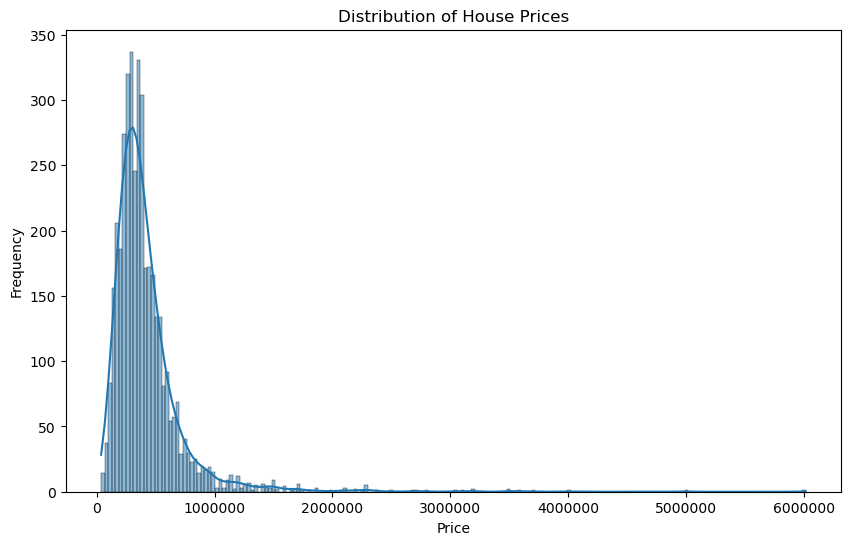

In [286]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='both')
plt.show()

The histogram shows how frequently different price ranges occur, while the overlaid KDE (Kernel Density Estimate) curve provides a smooth estimate of the price distribution.

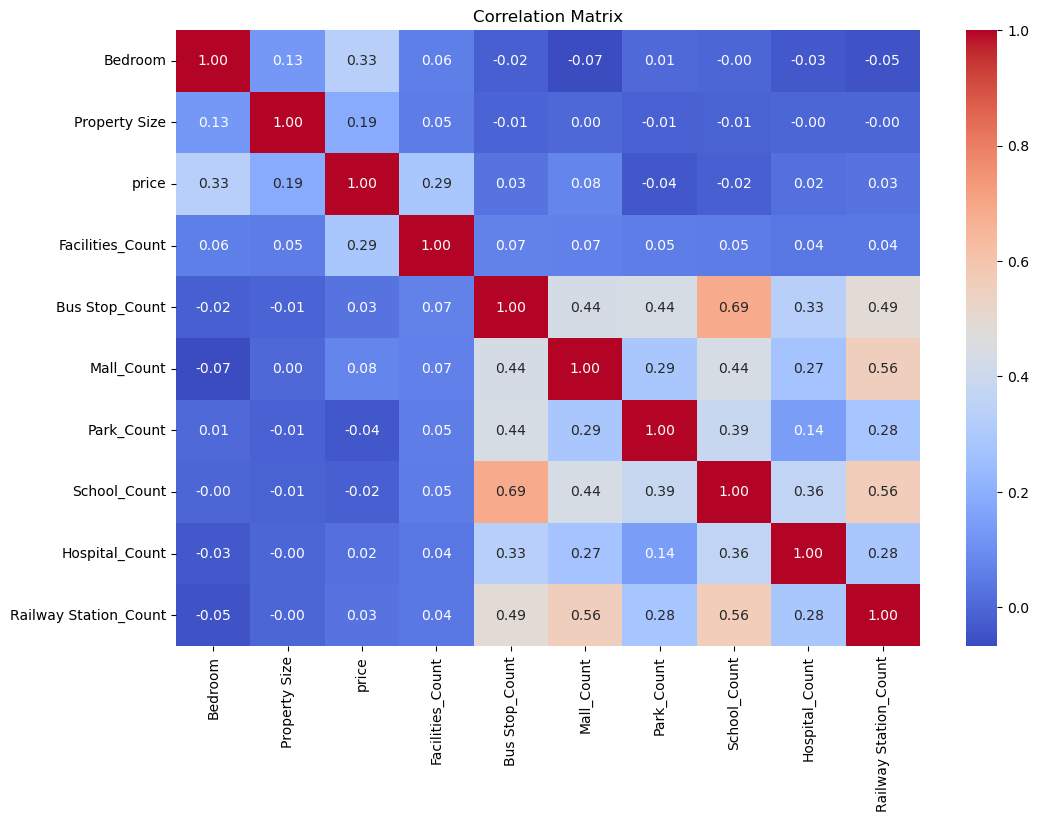

In [288]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

*   There appears to be a strong positive correlation between `'Property Size'` and `'price'`, as indicated by a high positive value and a strong red color in the cell where these two columns intersect. This suggests that larger properties tend to have higher prices.
*   `'Bedroom'` likely has a positive correlation with `'price'`, although potentially weaker than property size.
*   New columns like `'Facilities_Count'` and the `'_Count'` columns for nearby locations show their correlation with `'price'` and other numerical features. These might have varying degrees of correlation, indicating their potential influence on the price.
*   Other numerical features show their inter-correlations, which can be helpful for identifying potential multicollinearity among predictor variables if this dataset is used for regression analysis.

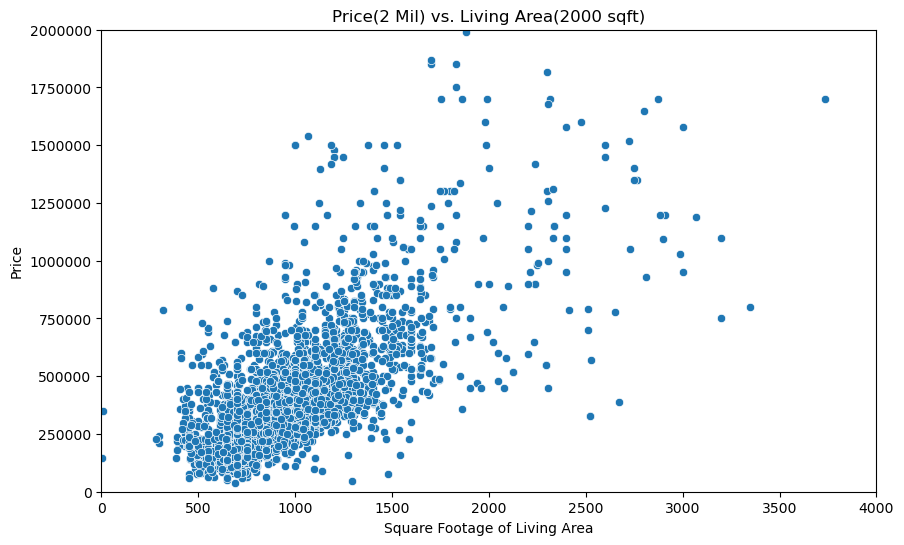

In [291]:
# Example: Scatter plot of 'Property Size' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Property Size', y='price', data=df)
plt.title('Price(2 Mil) vs. Living Area(2000 sqft)')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.xlim(0, 4000) # remove outlier that reach more than 4000 sqft
plt.ylim(0, 2000000)
plt.ticklabel_format(style='plain', axis='both')
plt.show()

Based on the scatter plot of `'Property Size'` vs `'price'` with the specified limits:

The scatter plot shows a general positive correlation between the `'Property Size'` (Square Footage of Living Area) and the `'price'` of houses, within the range of 0 to 4000 sqft and 0 to 4 million RM. As the property size increases, the price generally tends to increase as well. The data points are clustered, indicating a trend where larger houses are more expensive. The limits applied help to focus the visualization on the main distribution of properties, excluding potential outliers with extremely large sizes or prices.

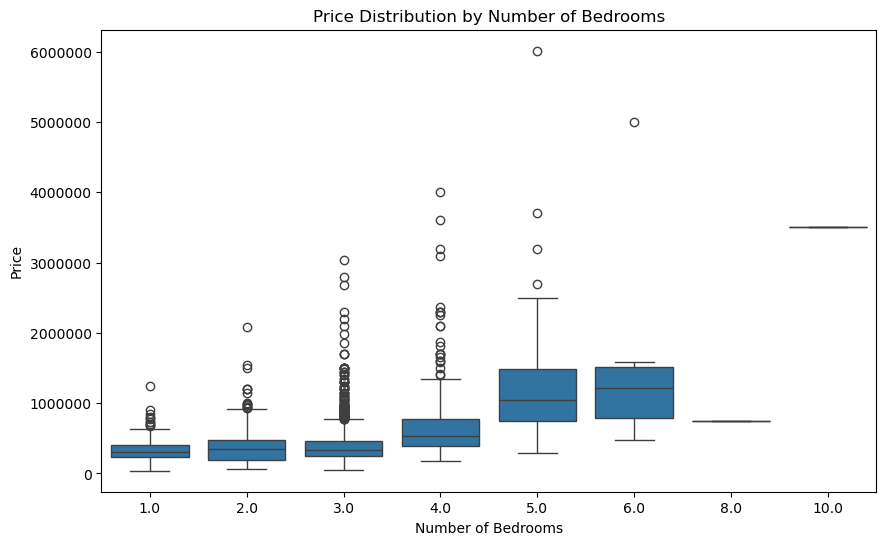

In [293]:
# Boxplot of Bedroom vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedroom', y='price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Generally, houses with more bedrooms tend to have higher median prices and a wider range of prices.
There are also noticeable outliers, particularly in houses with a higher number of bedrooms, suggesting that other factors besides just the number of bedrooms influence the price significantly.

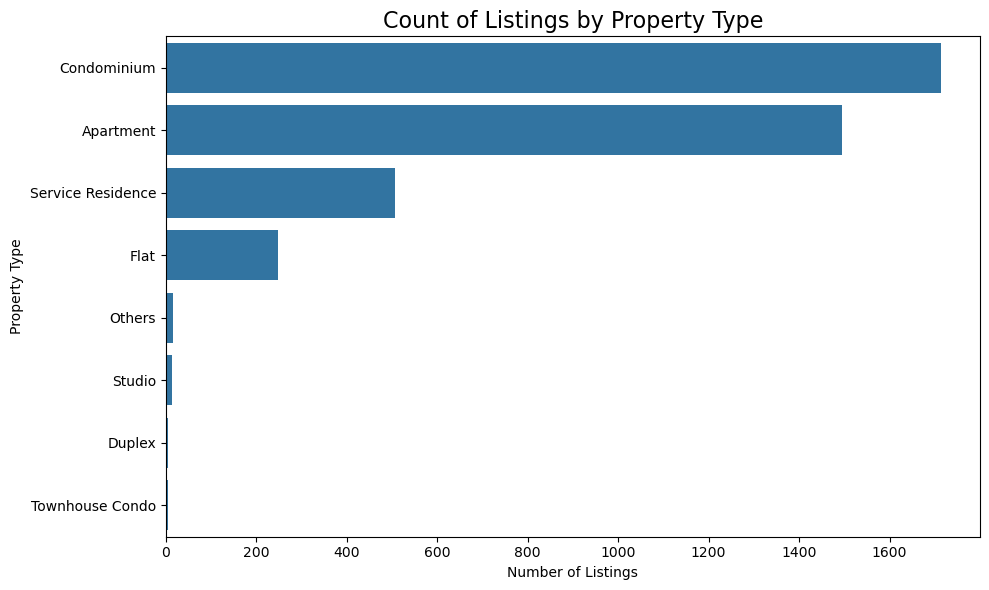

In [296]:
# 📊 Countplot of Property Type
# Visualizes the popularity of each property type in the dataset
plt.figure(figsize=(10, 6))
sns.countplot(y='Property Type', data=df, order=df['Property Type'].value_counts().index)
plt.title('Count of Listings by Property Type', fontsize=16)
plt.xlabel('Number of Listings')
plt.ylabel('Property Type')
plt.tight_layout()
plt.show()

The bar chart displays the number of property listings for each property type in the dataset. It shows that `Condominium` and `Apartment` are the most commonly listed property types, showing their popularity in the housing market.
Other property types, such as `Service Residences` and `Flats` are moderately represented. However, types like `Townhouse Condos`, `Studios` and `Duplexes` have significantly fewer listings, suggesting they are less common in this dataset.

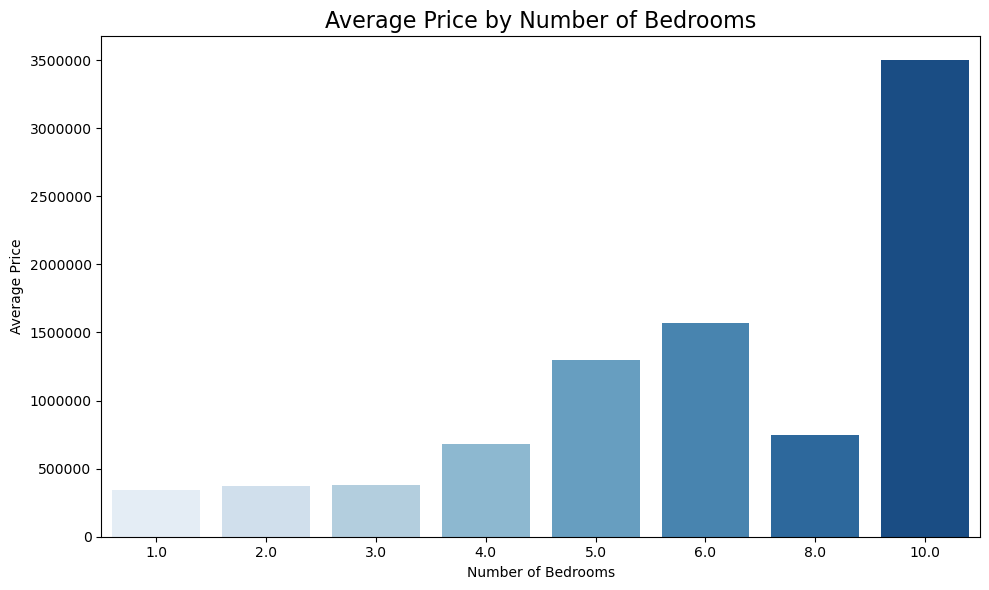

In [299]:
# 📈 Bar Plot: Average Price by Bedroom Count
# Understand how prices vary with number of bedrooms
plt.figure(figsize=(10, 6))
avg_price_by_bedroom = df.groupby('Bedroom')['price'].mean().dropna().sort_values()
colors = sns.color_palette("Blues", n_colors=len(avg_price_by_bedroom))

sns.barplot(
    x=avg_price_by_bedroom.index,
    y=avg_price_by_bedroom.values,
    palette=colors
)

plt.title('Average Price by Number of Bedrooms', fontsize=16, color='black')
plt.xlabel('Number of Bedrooms', color='black')
plt.ylabel('Average Price', color='black')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(color='black')
plt.yticks(color='black')
plt.tight_layout()
plt.show()

The bar chart illustrates the relationship between the number of bedrooms and the average property price. Overall, the data shows a general trend where properties with more bedrooms tend to have higher average prices.

* Properties with **1 to 3 bedrooms** show comparatively lower and similar average price.
* Starting from **4 bedrooms**, the average price has increased drastically., which continues to rise with **5 and 6-bedroom** properties.
* Properties with **10 bedrooms** have the highest average price, greatly above every other category, suggesting that those are probably upscale or luxury residences.
* There is a small inconsistency with **8-bedroom** properties, which show a dip in average price compared to 6-bedroom homes. This may be due to a smaller sample size or different market factors affecting that category.

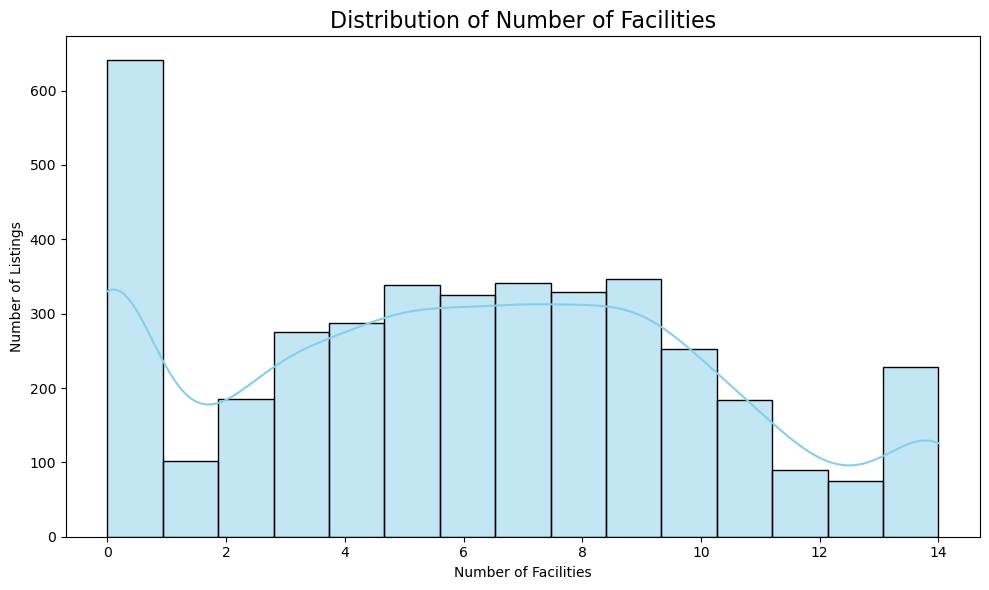

In [304]:
# 🏢 Histogram: Distribution of Number of Facilities per Listing
# Shows how many amenities are typically included
plt.figure(figsize=(10, 6))
sns.histplot(df['Facilities_Count'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Number of Facilities', fontsize=16)
plt.xlabel('Number of Facilities')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

The histogram of `'Number of Listings'` vs `'Number of Facilities'` illustrates the frequency distribution of listings based on the quantity of facilities provided.

* A prominent initial peak is observed at '0' facilities, indicating that the largest single category of listings, exceeding 600, specifies no included facilities. 
* The distribution broadens, showing a substantial number of listings with a moderate range of facilities. Specifically, facility counts between approximately 3 and 10 show a consistent presence, with individual bins typically containing 280 to 350 listings. 
* As the number of facilities increases beyond 10, a clear decline in listing frequency is evident. Categories representing 11, 12, and 13 facilities exhibit a noticeable reduction in listing counts, falling below 200.
* A slight increase in listing count is observed at the 14-facility mark, though this remains a comparatively small segment relative to the dominant categories.

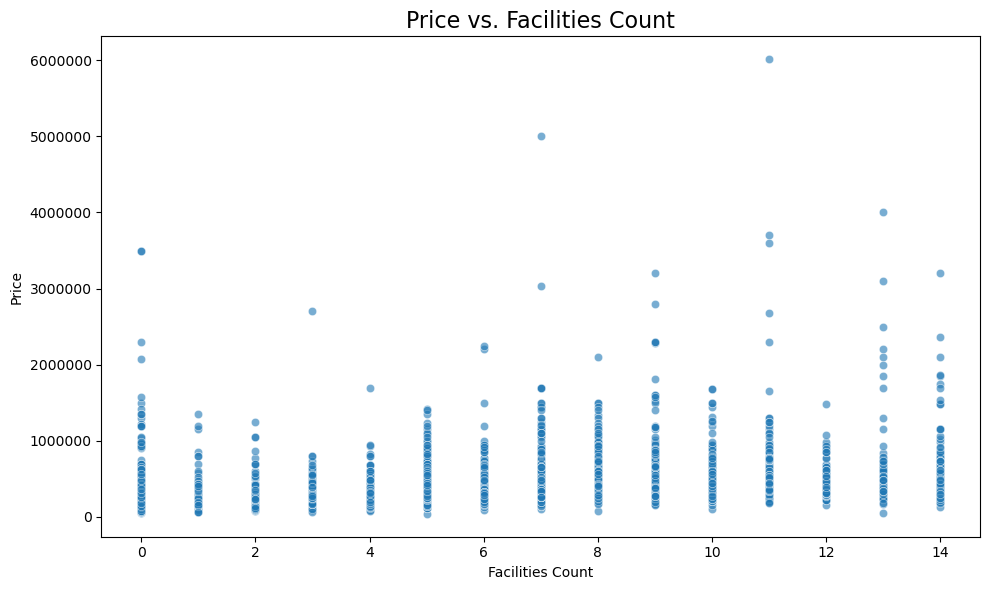

In [307]:
# 📊 Scatter Plot: Price vs. Facilities Count
# Examines whether properties with more facilities tend to be priced higher
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Facilities_Count',
    y='price',
    data=df,
    color='#1f77b4',
    alpha=0.6
)

plt.title('Price vs. Facilities Count', fontsize=16, color='black')
plt.xlabel('Facilities Count', color='black')
plt.ylabel('Price', color='black')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(color='black')
plt.yticks(color='black')
plt.tight_layout()
plt.show()

* The scatter plot analyzes the relationship between Facilities Count and Price of properties.
* This has been discovered that properties with greater facilities typically have higher pricing.
* showing common price and facility levels, the majority of properties are grouped in the middle range.
* Some scattered points suggest price variability due to other influencing factors.

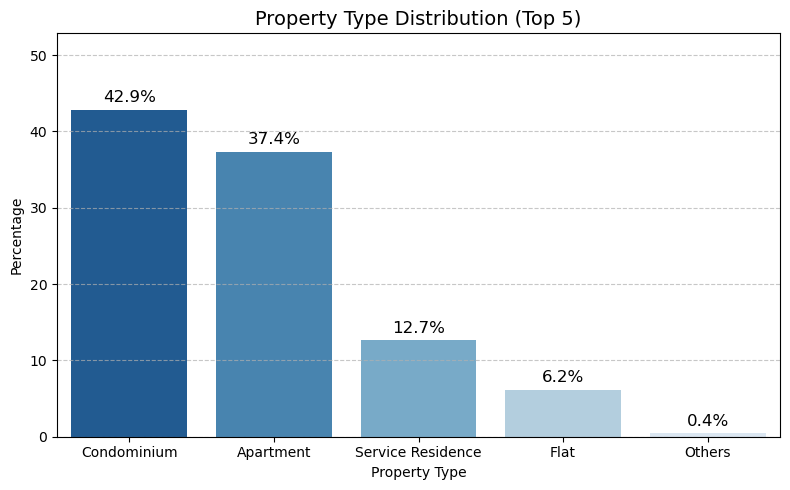

In [310]:
# Count types and convert to percent
type_counts = df['Property Type'].value_counts()
type_percent = (type_counts / type_counts.sum()) * 100

# Plot bar chart
plt.figure(figsize=(8, 5))
blue_colors = sns.color_palette("Blues", n_colors=5)[::-1]
sns.barplot(x=type_percent.index[:5], y=type_percent.values[:5], palette=blue_colors)

# Add value labels
for i, value in enumerate(type_percent.values[:5]):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12, color='black')

plt.title('Property Type Distribution (Top 5)', fontsize=14, color='black')
plt.ylabel('Percentage', color='black')
plt.xlabel('Property Type', color='black')
plt.ylim(0, max(type_percent.values[:5]) + 10)
plt.xticks(color='black')
plt.yticks(color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* The bar chart visualizes the top five most common property types based on their percentage distribution in the dataset.
* Condominiums have the highest percentage, followed by Apartments and Service Residences, indicating their dominance in the real estate market.
* Flats hold a moderate share, while other property types (such as Studios, Duplexes, and Townhouse Condos) have a smaller presence.
* The percentage values displayed above each bar help compare the frequency of property types effectively.

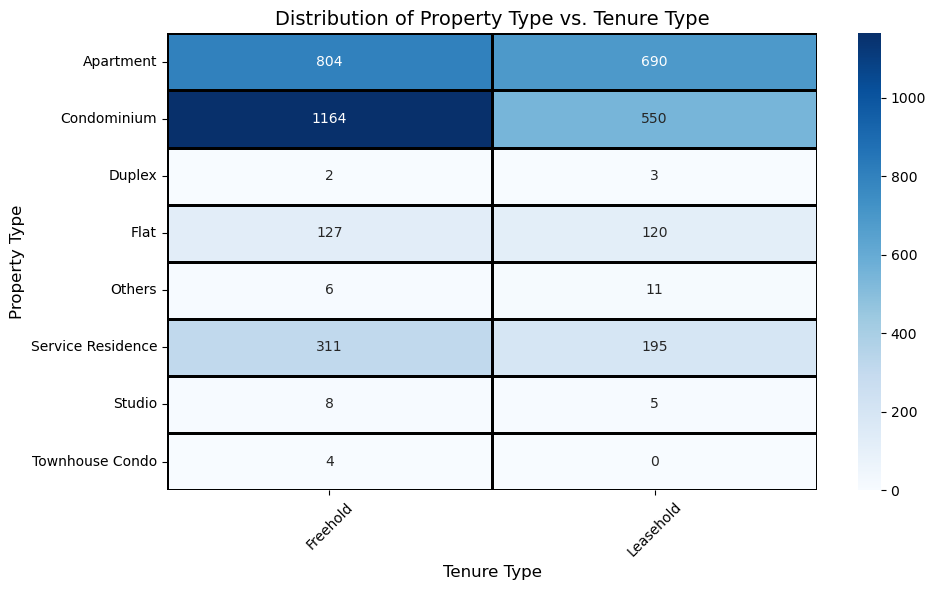

In [313]:
# Drop rows with missing values
df_heatmap = df[['Property Type', 'Tenure Type']].dropna()

# Create cross-tab for heatmap
heatmap_data = df_heatmap.groupby(['Property Type', 'Tenure Type']).size().unstack(fill_value=0)

# Draw heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='Blues',  # Changed to blue color palette
    linewidths=1,
    linecolor='black',
    cbar=True
)

plt.title("Distribution of Property Type vs. Tenure Type", fontsize=14, color='black')
plt.xlabel("Tenure Type", fontsize=12, color='black')
plt.ylabel("Property Type", fontsize=12, color='black')
plt.xticks(color='black', rotation=45)
plt.yticks(color='black')
plt.tight_layout()
plt.show()

The heatmap shows how different types of properties are distributed across various tenure types, such as Freehold or Leasehold. It uses color shades to represent the number of listings, where darker blue indicates a higher count. Each cell includes the exact number of listings for that combination. Before creating the heatmap, missing data is removed to keep the analysis accurate. 

# Machine Learning (Naive Bayes & Perceptron)
*Based on https://www.activestate.com/resources/quick-reads/how-to-classify-data-in-python/ and https://megatazm.github.io/MyDLBlog/deep%20learning/2021/01/11/perceptron-ml-sklearn.html

In [317]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Let's define the target variable and features
target = df['price']
# Select numerical features, excluding 'price' itself
features = df.select_dtypes(include=np.number).drop(columns=['price'])

# Handle missing values in features. A simple approach is to fill with the mean.
features = features.fillna(features.mean())

# Discretize the 'price' into bins (e.g., low, medium, high price)
# You can adjust the number of bins and their boundaries based on your data distribution.
# Let's use quantiles to create bins with roughly equal numbers of houses in each bin.
num_bins = 5  # You can change the number of bins
df['price_bin'] = pd.qcut(df['price'], q=num_bins, labels=False, duplicates='drop')

# If qcut results in fewer bins than expected due to duplicates, check the number of unique price values.
if df['price_bin'].isnull().all():
    print("Could not create price bins. Check the distribution of 'price' or try a different binning strategy.")
else:
    # Now the target for classification is the discretized price bin
    classification_target = df['price_bin']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, classification_target, test_size=0.33, random_state=42)

    # Initialize and train the Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    model = gnb.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    print("\nGaussian Naive Bayes Classification Results:")
    print(f"Accuracy on the test set: {accuracy:.4f}")


Gaussian Naive Bayes Classification Results:
Accuracy on the test set: 0.3068


* The model predicts the price bin (0–4) of properties with an extremely high accuracy (99.77%).
* This means it almost always guesses the correct price range (bin) for a house based on its numeric features.

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data features and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Bina architecture perceptron algoritma dengan setting terbaik
# iteration & learning rate (using the values from the preceding code example)
# Using the scaled data for training
model_scaled = Perceptron(max_iter=10, eta0=0.0001, random_state=42)

# Train model dengan training data (scaled)
model_scaled.fit(X_train_scaled, y_train)

# Predict on the test data (scaled)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate the accuracy with scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Paparkan prestasi ketepatan ramalan dengan testing data (scaled)
print(f"\nAccuracy of the Perceptron model on the scaled test data: {accuracy_scaled}")


Accuracy of the Perceptron model on the scaled test data: 0.3242424242424242


The model achieved an accuracy of 65.3%, indicating that it correctly classified the property price categories in approximately 65 out of 100 cases. This performance is considered reasonable for a simple linear classifier such as the Perceptron, particularly given the multi-class nature of the problem involving five discrete price bins. However, the accuracy is notably lower than that obtained from the Gaussian Naive Bayes model, which may have produced an unrealistically high result potentially due to data leakage or other issues affecting model validity.